# Aluminum

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pydeft as deft
import profess

Begin by choosing cell vectors for an FCC lattice.

In [2]:
box_vectors = 4.050 * np.array([[0.5, 0.5, 0.0],
                                [0.0, 0.5, 0.5],
                                [0.5, 0.0, 0.5]])
print(box_vectors)

[[2.025 2.025 0.   ]
 [0.    2.025 2.025]
 [2.025 0.    2.025]]


Next, create a profess system and set its box vectors accordingly.

In [3]:
system = profess.System([18,18,18])
system.set_box(box_vectors, 'a')

Next, add ions to the system. For the FCC primitive cell, only a single ion at the origin is required.

After adding the ions, we also distribute the electrons uniformly.

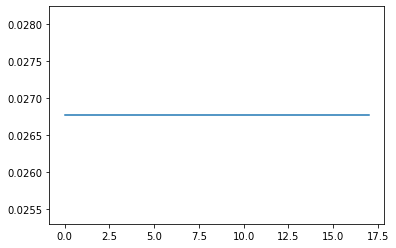

In [4]:
system.add_ions('al.gga.recpot', np.zeros([1,3]), 'a')
system.distribute_electrons_uniformly(system.total_ion_charge())

plt.plot(system.electron_density[:,0,0])
plt.show()

As a final initialization, set the energy functional, which includes multiple terms.

In [5]:
(
system.add_hartree_functional()
    .add_ion_electron_functional()
    .add_perdew_burke_ernzerhof_functional()
    .add_wang_teter_functional()
)
energy = system.energy('ev')
print('{:5.3f}'.format(energy))

-54.926


Now that the functional is set, minimize the energy by varying the electron density.

-57.183


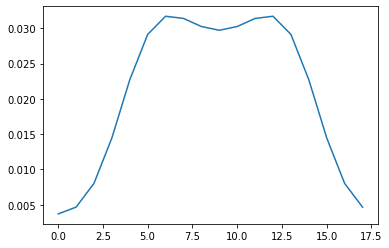

In [6]:
system.minimize_energy()
energy = system.energy('ev')
print('{:5.3f}'.format(energy))
plt.plot(system.electron_density[:,0,0])
plt.show()